In [41]:
import pandas as pd
import numpy as np
from performance_metrics import performance_metrics
import matplotlib.pyplot as plt

In [58]:
data=pd.read_csv('data.txt', sep='\t', index_col=-1)
data.index=pd.to_datetime(data.index)
data

,netRad_era5_lag0,netRad_era5_lag2,tp_mswep_lag0,tp_mswep_lag1,tp_mswep_lag2,sm_esacci_lag0,tws_csr_interp_lag0
time,,,,,,,
2002-07-31,166.055518,211.113797,20.127906,13.432412,7.553935,0.252453,6.521605
2002-08-31,150.306444,191.021664,22.754123,20.127906,13.432412,0.292124,6.589201
2002-09-30,157.829033,166.055518,15.534696,22.754123,20.127906,0.278470,1.067907
2002-10-31,166.542014,150.306444,5.631837,15.534696,22.754123,0.225015,-5.148187
2002-11-30,155.330791,157.829033,1.666738,5.631837,15.534696,0.182522,-7.440371
...,...,...,...,...,...,...,...
2015-10-31,167.059710,151.678874,3.743710,10.965264,22.707126,0.207717,5.083368
2015-11-30,150.250567,167.838386,1.263790,3.743710,10.965264,0.174077,0.592380
2015-12-31,139.267582,167.059710,0.731772,1.263790,3.743710,0.153839,-1.679285


In [59]:
target_variables = data['tws_csr_interp_lag0']

time
2002-07-31     6.521605
2002-08-31     6.589201
2002-09-30     1.067907
2002-10-31    -5.148187
2002-11-30    -7.440371
                ...    
2015-10-31     5.083368
2015-11-30     0.592380
2015-12-31    -1.679285
2016-01-31   -11.461681
2016-02-29   -12.123386
Name: tws_csr_interp_lag0, Length: 164, dtype: float64

In [60]:
predictor_variables = data.drop(['tws_csr_interp_lag0'], axis=1)

,netRad_era5_lag0,netRad_era5_lag2,tp_mswep_lag0,tp_mswep_lag1,tp_mswep_lag2,sm_esacci_lag0
time,,,,,,
2002-07-31,166.055518,211.113797,20.127906,13.432412,7.553935,0.252453
2002-08-31,150.306444,191.021664,22.754123,20.127906,13.432412,0.292124
2002-09-30,157.829033,166.055518,15.534696,22.754123,20.127906,0.278470
2002-10-31,166.542014,150.306444,5.631837,15.534696,22.754123,0.225015
2002-11-30,155.330791,157.829033,1.666738,5.631837,15.534696,0.182522
...,...,...,...,...,...,...
2015-10-31,167.059710,151.678874,3.743710,10.965264,22.707126,0.207717
2015-11-30,150.250567,167.838386,1.263790,3.743710,10.965264,0.174077
2015-12-31,139.267582,167.059710,0.731772,1.263790,3.743710,0.153839


In [61]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

In [62]:
X = predictor_variables
y = target_variables;


In [63]:
# Training on the first half of the data and using the later half for validation
# The idea is to validate against a scenario where the model has not seen the data before
train_size = 0.6
train_index = int(len(data) * train_size)

print(f'train size is %: {(train_size)*100}')
X_train = X.iloc[:train_index]   
y_train = y.iloc[:train_index]
X_test = X.iloc[train_index:]
y_test = y.iloc[train_index:];
print(X_train.head(1), y_train.head(1))
print(X_test.head(1), y_test.head(1))

train size is %: 60.0
            netRad_era5_lag0  netRad_era5_lag2  tp_mswep_lag0  tp_mswep_lag1  \
time                                                                           
2002-07-31        166.055518        211.113797      20.127906      13.432412   

            tp_mswep_lag2  sm_esacci_lag0  
time                                       
2002-07-31       7.553935        0.252453   time
2002-07-31    6.521605
Name: tws_csr_interp_lag0, dtype: float64
            netRad_era5_lag0  netRad_era5_lag2  tp_mswep_lag0  tp_mswep_lag1  \
time                                                                           
2010-09-30        143.989481        157.912275      20.168736      28.766989   

            tp_mswep_lag2  sm_esacci_lag0  
time                                       
2010-09-30      25.931024        0.295138   time
2010-09-30    1.990765
Name: tws_csr_interp_lag0, dtype: float64


In [64]:
# Standardize the features (optional)
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test);

X_train_scaled = X_train;
X_test_scaled = X_test;

Partial least squares is very similar to simple least squares.

The only difference being that before applying least squares regression of the predictors onto the target variable we decompose the predictors using Principal component analysis (Eigen values and vectors) and take the first few PCs only for prediction.

Thus if all the PCs are taken, then PLS is equivalent to simple least squares.

In [65]:
# Create a PLS regression model
n_components = 4  # Specify the number of components (adjust as needed)
pls = PLSRegression(n_components=n_components)

# Fit the model to the training data
pls.fit(X_train_scaled, y_train)

PLSRegression(n_components=4)

In [66]:
# Get the regression coefficients
coefficients = pls.coef_

# Display the coefficients
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
print("PLS Regression Coefficients:")
print(coefficients_df)

PLS Regression Coefficients:
   netRad_era5_lag0  netRad_era5_lag2  tp_mswep_lag0  tp_mswep_lag1  \
0         -0.599024          1.306872       3.983681       0.784212   

   tp_mswep_lag2  sm_esacci_lag0  
0      -3.147545        0.987337  


In [74]:
# Make predictions on complete data
# custom_X_pred_scaled = X
# custom_y_pred = pls.predict(custom_X_pred_scaled);
# custom_y_test = y;

# # # Make predictions on test data
custom_X_pred_scaled = X_test_scaled
custom_y_pred = pls.predict(custom_X_pred_scaled);
custom_y_test = y_test;

In [75]:
metrics_dict = performance_metrics(custom_y_test, custom_y_pred);

{
    "RMSE": 6.45,
    "NRMSE": 0.98,
    "NSE": 0.02,
    "KGE": 0.48,
    "R-squared": 0.23
}


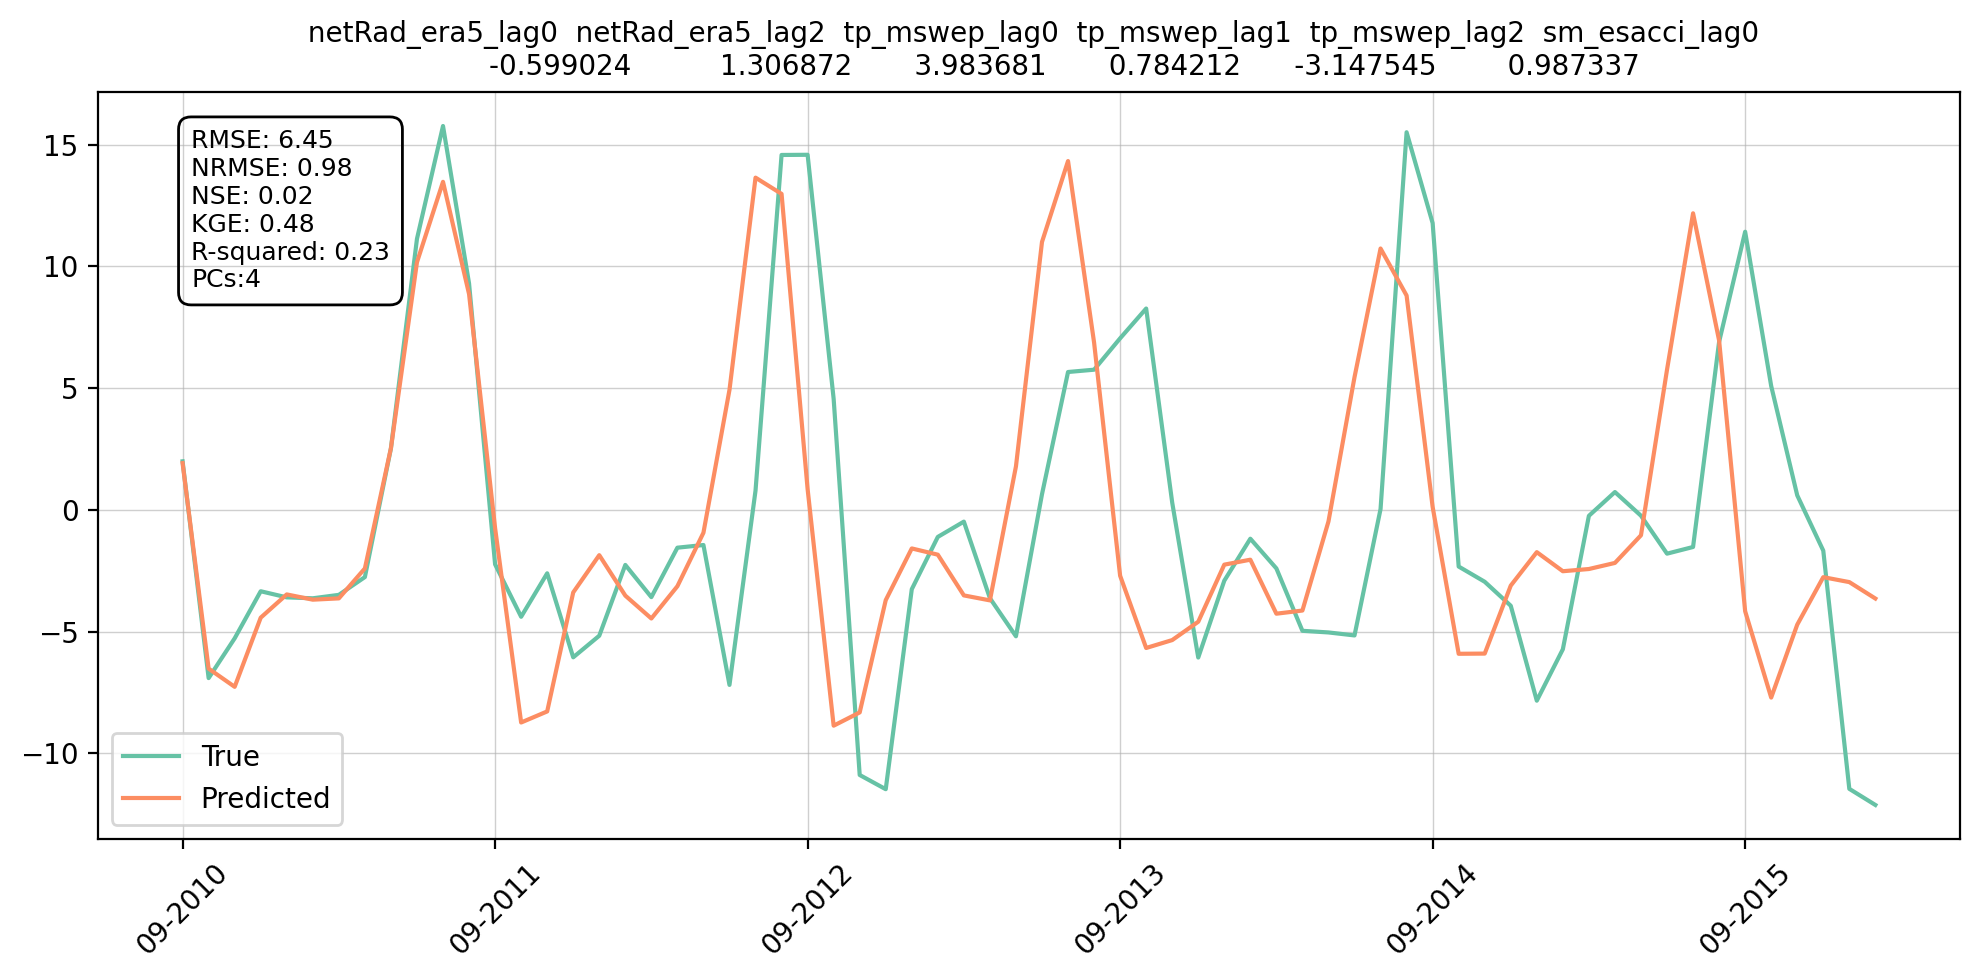

In [76]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.plot(custom_y_test.values, color='#66c2a5', label='True')
ax.plot(custom_y_pred, color='#fc8d62', label='Predicted')
# textbox = '\n'.join([f'{key}: {value}' for key, value in metrics_dict.items()])
textbox = '\n'.join([f'{key}: {value}' for key, value in metrics_dict.items()]+[f'PCs:{n_components}'])
# Add the metrics_dict as a textbox to the plot
ax.text(0.05, 0.95, textbox, transform=ax.transAxes, fontsize=9,
        verticalalignment='top',
        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

# Get the xticks from the dataframe 'data'
xticks = data.index[train_index:]

# Change the format of xticks to mm-yyyy only
xticks = [date.strftime('%m-%Y') for date in xticks]

# Set the xticks on the plot
ax.set_xticks(range(0, len(xticks), 12)) 

# # Add vertical lines at the xticks
# for xtick in ax.get_xticks():
#     ax.axvline(x=xtick, color='gray', linestyle='--', alpha=0.5)
ax.set_xticklabels(xticks[::12], rotation=45)

ax.set_title(coefficients_df.to_string(index=False), fontsize=10)
plt.grid(True, alpha=0.6, lw=0.5)

plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig(f'/home/caliber/research/dynamical_model/figs/full/{input_type_}.png'
#             , dpi=300, bbox_inches='tight')
plt.show()